# Gamma-cat with Gammapy

Examples of how to access and plot gamma-cat data with Gammapy.

Please note that this is still very much work in progress.

* The data index and collection classes are missing features and still buggy (no-one used them so far).
* There is no file to Gammapy model object mapper yet implemented for the YAML files
* The catalog class is in better shape (but doesn't offer access to all data from gamma-cat)

Pull requests to improve on this welcome any time!

As an example, let's see if we can do something useful for https://github.com/gammapy/gamma-cat/issues/98 and check the status of the data we have on IC 443 in gamma-cat

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
from pathlib import Path
from pprint import pprint
import json
import yaml
from astropy.units import Unit
from gammapy.catalog import GammaCatResourceIndex, GammaCatDataCollection, SourceCatalogGammaCat
from gammapy.spectrum import FluxPoints
from gammapy.spectrum.models import PowerLaw

In [3]:
# The read methods in GammaCatResourceIndex, GammaCatDataCollection
# seem to be broken, so we just read it manually

In [4]:
gamma_cat_path = Path(os.environ['GAMMA_CAT'])
filename = str(gamma_cat_path / 'input/input-datasets.json')
resources = GammaCatResourceIndex.from_list(json.load(open(filename)))
r29 = resources.query('source_id==29')
r29.to_table()

source_id,reference_id,file_id,type,location
int64,str19,int64,str3,str49
29,2009ApJ...698L.133A,-1,ds,data/2009/2009ApJ...698L.133A/tev-000029.yaml
29,2009ApJ...698L.133A,-1,sed,data/2009/2009ApJ...698L.133A/tev-000029-sed.ecsv
29,2015arXiv151201911H,-1,ds,data/2015/2015arXiv151201911H/tev-000029.yaml


In [5]:
gamma_cat_path = Path(os.environ['GAMMA_CAT'])
filename = str(gamma_cat_path / 'output/gammacat-datasets.json')
resources = GammaCatResourceIndex.from_list(json.load(open(filename)))
r29 = resources.query('source_id==29')
r29.to_table()

source_id,reference_id,file_id,type,location
int64,str19,int64,str3,str69
29,,-1,bsi,sources/tev-000029.yaml
29,2007ApJ...664L..87A,-1,ds,data/2007ApJ...664L..87A/gammacat_2007ApJ...664L..87A_000029_ds.yaml
29,2009ApJ...698L.133A,-1,ds,data/2009ApJ...698L.133A/gammacat_2009ApJ...698L.133A_000029_ds.yaml
29,2009ApJ...698L.133A,-1,sed,data/2009ApJ...698L.133A/gammacat_2009ApJ...698L.133A_000029_sed.ecsv
29,2015arXiv151201911H,-1,ds,data/2015arXiv151201911H/gammacat_2015arXiv151201911H_000029_ds.yaml


In [6]:
filename = gamma_cat_path / 'input' / 'data/2009/2009ApJ...698L.133A/tev-000029-sed.ecsv'
sed1 = FluxPoints.read(filename)
sed1.table

e_ref,dnde,dnde_err
TeV,1 / (m2 s TeV),1 / (m2 s TeV)
float32,float32,float32
0.358,1.64e-07,6.27e-08
0.462,4.73e-08,2.4e-08
0.595,4.01e-08,1.32e-08
0.8,1.51e-08,5.55e-09
1.347,1.59e-09,1.12e-09


In [7]:
filename = str(gamma_cat_path / 'input' / 'data/2009/2009ApJ...698L.133A/tev-000029.yaml')
data1 = yaml.load(open(filename))
pprint(data1)

{'data': {'excess': 247,
          'livetime': '37.9h',
          'significance': 8.3,
          'significance_post_trial': 7.5},
 'morph': {'sigma': {'err': '0.03d', 'err_sys': '0.04d', 'val': '0.16d'},
           'type': 'gauss'},
 'pos': {'dec': {'err': '0.03d', 'err_sys': '0.08d', 'val': '+22d30m11s'},
         'ra': {'err': '0.03d', 'err_sys': '0.08d', 'val': '06h16m51s'}},
 'reference_id': '2009ApJ...698L.133A',
 'source_id': 29,
 'spec': {'erange': {'max': 2.0, 'min': 0.317, 'unit': 'TeV'},
          'model': {'parameters': {'e_ref': {'unit': 'TeV', 'val': 1},
                                   'index': {'err': 0.38,
                                             'err_sys': 0.3,
                                             'val': 2.99},
                                   'norm': {'err': 2.1,
                                            'err_sys': 2.5,
                                            'scale': '1e-13',
                                            'unit': 'cm-2 s-1 TeV-1',


In [8]:
filename = str(gamma_cat_path / 'input' / 'data/2015/2015arXiv151201911H/tev-000029.yaml')
data2 = yaml.load(open(filename))
pprint(data2)

{'data': {'livetime': '155h'},
 'morph': {'sigma': {'val': '0.3d'}, 'type': 'shell'},
 'pos': {'dec': {'val': '+23d33m00s'}, 'ra': {'val': '06h16m52.8s'}},
 'reference_id': '2015arXiv151201911H',
 'source_id': 29,
 'spec': {'erange': {'min': 0.19, 'unit': 'TeV'},
          'model': {'parameters': {'e_ref': {'unit': 'TeV', 'val': 0.55},
                                   'index': {'err': 0.09, 'val': 2.8},
                                   'norm': {'err': 0.09,
                                            'scale': '1e-12',
                                            'unit': 'cm-2 s-1 TeV-1',
                                            'val': 0.992}},
                    'type': 'pl'},
          'theta': '0.30d'},
 'telescope': 'veritas'}


In [9]:
def par_to_val(par):
    print(par)
    return par['val'] * float(par.get('scale', 1)) * Unit(par.get('unit', ''))

def make_spectral_model_pl(data):
    pars = data['spec']['model']['parameters']
    index = par_to_val(pars['index'])
    amplitude = par_to_val(pars['norm'])
    reference = par_to_val(pars['e_ref'])
    return PowerLaw(index, amplitude, reference)

In [10]:
model1 = make_spectral_model_pl(data1)
print(model1)

{'val': 2.99, 'err': 0.38, 'err_sys': 0.3}
{'val': 8.38, 'err': 2.1, 'err_sys': 2.5, 'scale': '1e-13', 'unit': 'cm-2 s-1 TeV-1'}
{'val': 1, 'unit': 'TeV'}
PowerLaw

Parameters: 

	   name     value   error       unit      min max frozen
	--------- --------- ----- --------------- --- --- ------
	    index 2.990e+00   nan                 nan nan  False
	amplitude 8.380e-13   nan 1 / (cm2 s TeV) nan nan  False
	reference 1.000e+00   nan             TeV nan nan   True


In [11]:
model2 = make_spectral_model_pl(data2)
print(model2)

{'val': 2.8, 'err': 0.09}
{'val': 0.992, 'err': 0.09, 'scale': '1e-12', 'unit': 'cm-2 s-1 TeV-1'}
{'val': 0.55, 'unit': 'TeV'}
PowerLaw

Parameters: 

	   name     value   error       unit      min max frozen
	--------- --------- ----- --------------- --- --- ------
	    index 2.800e+00   nan                 nan nan  False
	amplitude 9.920e-13   nan 1 / (cm2 s TeV) nan nan  False
	reference 5.500e-01   nan             TeV nan nan   True


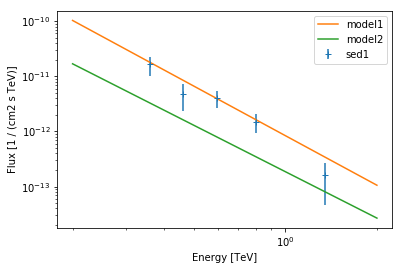

In [12]:
energy_range = [0.2, 2] * Unit('TeV')
sed1.plot(label='sed1')
model1.plot(energy_range, label='model1')
model2.plot(energy_range, label='model2')
plt.legend()